# Cálculo das taxas de retorno

As taxas de retorno de ações são medidas que indicam o ganho ou perda de um investimento em ações ao longo de um período específico. Elas são expressas geralmente em porcentagem e refletem a variação no valor da ação.

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
from datetime import date, timedelta
import StockDataProcessor


import matplotlib.pyplot as plt
import seaborn as sns


# Configurations
import warnings
warnings.filterwarnings("ignore")

# Configuração dos gráficos
from matplotlib import rc

# Estilo dos gráficos
# Referência: https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html
plt.style.use('Solarize_Light2')
%config InlineBackend.figure_format = 'retina'  # Formato das imagens

# Configurações de fontes
rc('font', **{"family":"sans-serif","sans-serif":["DejaVu Sans"], "size":9})
rc('mathtext', **{"default":"regular"})

%matplotlib inline

In [5]:
# Define the date range
start_date = date.today() - timedelta(days=1825)
end_date = date.today()

# List of stocks and corresponding company names
stocks = ['POMO4.SA', 'WEGE3.SA', 'PETR4.SA', 'BTLG11.SA', 'MGLU3.SA', 'B3SA3.SA']
company_names = ["Marcopolo", "Weg", "Petrobras", "BTG logística","Magalu", "Bovespa"]

# Initialize the processor
processor = StockDataProcessor.StockDataProcessor(stocks, company_names, start_date, end_date)

# Process all stocks
processor.process_all_stocks()

# Combine all price data
processor.combine_all_price_data()

df_adj_close = processor.combined_data['Adj Close']
df_adj_close = df_adj_close.set_index('Date')
df_adj_close


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Price,Marcopolo,Weg,Petrobras,BTG logística,Magalu,Bovespa
Date,,,,,,
2019-11-27 00:00:00+00:00,2.866673,13.534078,9.987255,80.293747,106.238625,12.893829
2019-11-28 00:00:00+00:00,2.866673,13.711118,10.055359,80.262749,106.238625,13.084046
2019-11-29 00:00:00+00:00,2.882823,14.172346,9.925962,80.185158,104.910645,12.967198
2019-12-02 00:00:00+00:00,2.890898,14.051215,9.898720,80.239502,104.654373,12.934592
2019-12-03 00:00:00+00:00,2.882823,14.307452,9.868075,82.201828,103.885536,13.073175
...,...,...,...,...,...,...
2024-11-14 00:00:00+00:00,9.420000,54.349998,37.270000,96.520004,9.000000,10.270000
2024-11-18 00:00:00+00:00,9.570000,54.000000,38.200001,96.430000,9.230000,10.000000
2024-11-19 00:00:00+00:00,9.590000,54.130001,37.799999,97.099998,9.380000,10.020000


## Taxas de retornos

### Retorno Simples do período

Forma mais básica de calcular o retorno de uma ação. Ela considera apenas a variação no preço da ação entre dois pontos no tempo, o valor inicial e final.




In [3]:
# Função para calcular e imprimir o retorno simples
def calculate_simple_return(df):
    """
    Calculate and print the simple return for a specific column in a DataFrame.
    
    Parameters:
    - column (str): The column name for which the simple return is calculated.
    - df (pd.DataFrame): The DataFrame containing the stock prices.
    """

    initial_price = df[column].iloc[0]
    final_price = df[column].iloc[-1]
    simple_return = round((final_price - initial_price) / initial_price,4)
    return simple_return

for column in df_adj_close.columns:
    simple_return = calculate_simple_return(df_adj_close)
    print(f'Empresa: {column}, Retorno Simples: {simple_return*100}')

Empresa: Marcopolo, Retorno Simples: 226.14000000000001
Empresa: Weg, Retorno Simples: 296.32
Empresa: Petrobras, Retorno Simples: 274.48
Empresa: BTG logística, Retorno Simples: 20.119999999999997
Empresa: Magalu, Retorno Simples: -91.14
Empresa: Bovespa, Retorno Simples: -24.34


## Retorno Diário

O retorno diário de uma ação é a variação percentual no preço da ação de um dia para o outro. Esse tipo de retorno é especialmente útil para traders e investidores que monitoram o mercado de perto e realizam transações frequentes

In [4]:
def calculate_daily_returns(df, company_names):
    """
    Calculate daily returns for each company in the DataFrame.

    Parameters:
    - df (pd.DataFrame): DataFrame containing adjusted close prices with companies as columns.
    - company_names (list): List of company names (corresponding to DataFrame columns).

    Returns:
    - pd.DataFrame: DataFrame with daily returns added as new columns.
    """
    for column in company_names:
        df[column + ' Daily Return'] = df[column].pct_change()
    return df

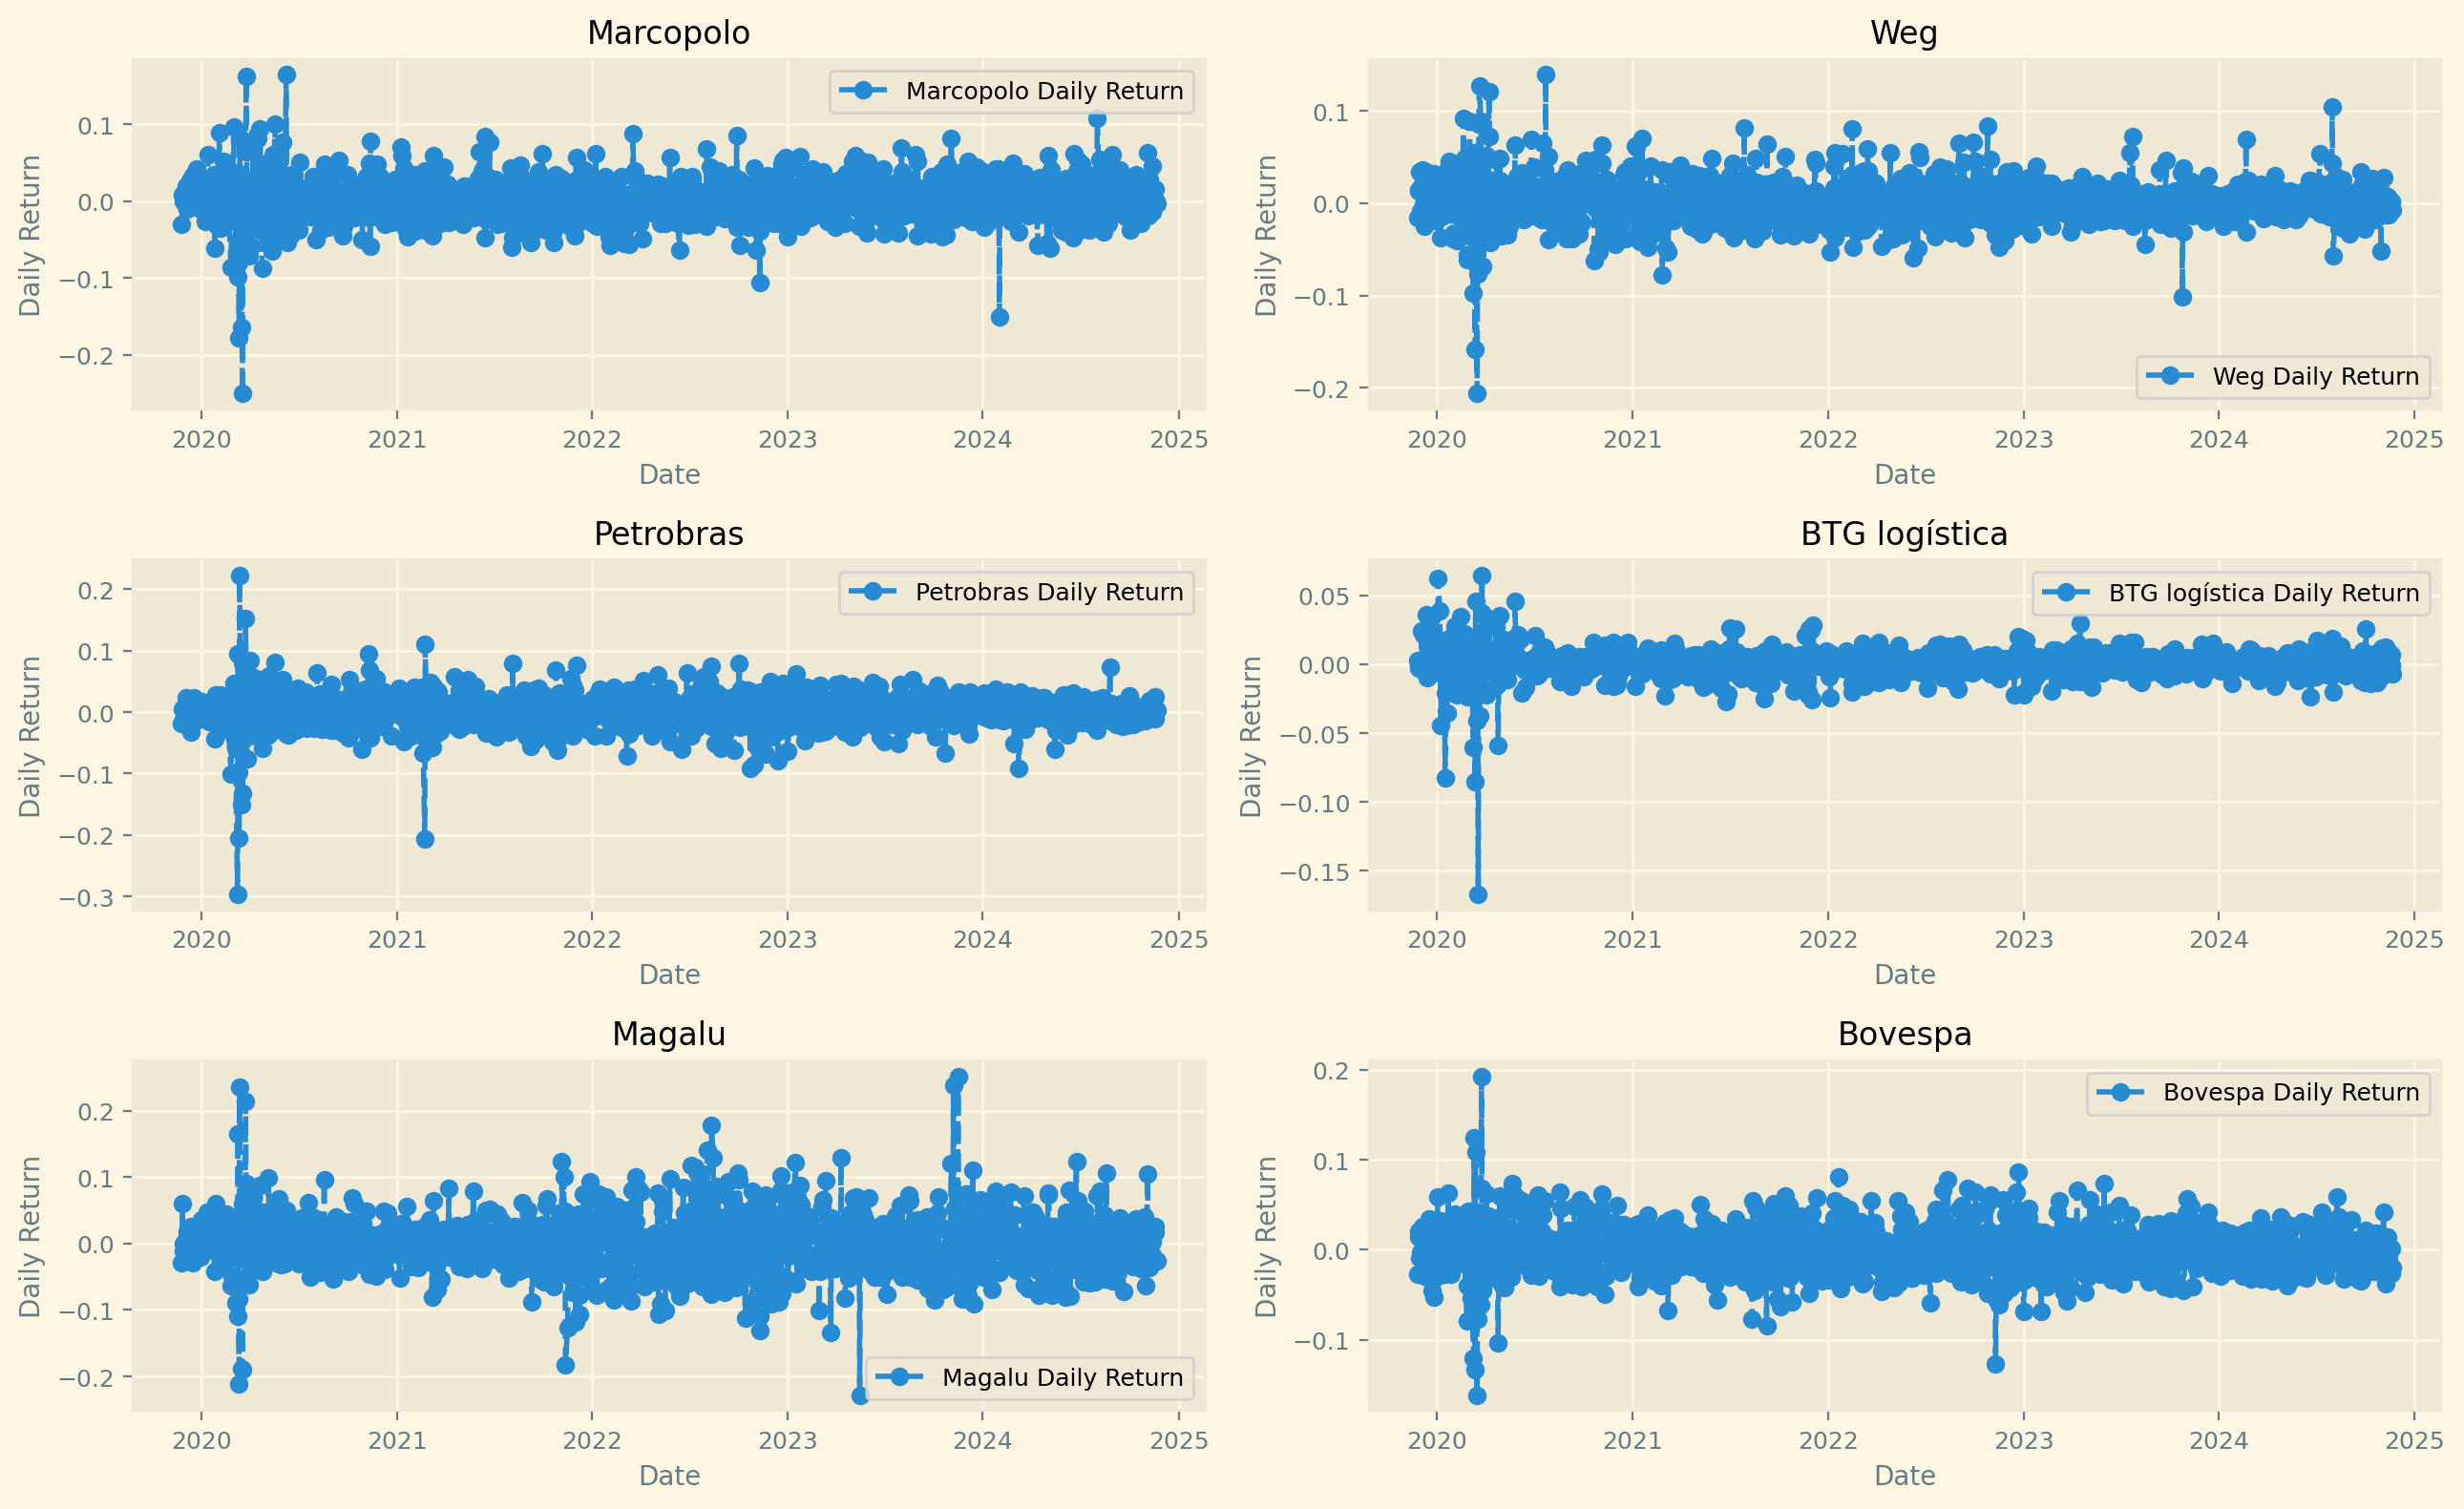

In [5]:
def plot_returns(df, return_type, company_names, figsize=(13, 8)):
    """
    Plot returns (daily or yearly) for each company.

    Parameters:
    - df (pd.DataFrame): DataFrame containing adjusted close prices and calculated returns.
    - return_type (str): Type of return to plot ('Daily Return' or 'Yearly Return').
    - company_names (list): List of company names (corresponding to DataFrame columns).
    - figsize (tuple): Size of the figure (width, height).
    """
    # Validate inputs
    if return_type not in ['Daily Return', 'Yearly Return']:
        raise ValueError("Invalid return_type. Use 'Daily Return' or 'Yearly Return'.")
    missing_columns = [col for col in company_names if f"{col} {return_type}" not in df.columns]
    if missing_columns:
        raise ValueError(f"Missing return columns in DataFrame: {', '.join(missing_columns)}")
    
    num_companies = len(company_names)
    num_rows = (num_companies + 1) // 2  # Calculate rows needed for subplots
    fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=figsize)
    axes = axes.flatten()  # Flatten axes for easy indexing

    for i, company in enumerate(company_names):
        if i >= len(axes):  # Skip if more companies than subplots
            break

        ax = axes[i]
        column_name = f"{company} {return_type}"

        if return_type == 'Daily Return':
            ax.plot(df.index, df[column_name], linestyle='--', marker='o', label=f'{company} {return_type}')
        elif return_type == 'Yearly Return':
            ax.bar(df.index, df[column_name], label=f'{company} {return_type}')

        # Customize the subplot
        ax.set_title(company, fontsize=12)
        ax.set_ylabel(return_type, fontsize=10)
        ax.set_xlabel('Date' if return_type == 'Daily Return' else 'Year', fontsize=10)
        ax.legend(fontsize=9)
        ax.grid(True)

    # Hide any extra subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    # Adjust layout to prevent overlap and improve spacing
    fig.tight_layout()

    # Show the plot
    plt.show()

# Example Usage
df = df_adj_close.copy()
company_names = list(df.columns)

# Add 'Carteira' (Portfolio) column and calculate its returns
df_daily_return = calculate_daily_returns(df, company_names)

# Plot daily returns
plot_returns(df, 'Daily Return', company_names)


In [6]:
# Calculate and print annualized return for each column containing "Daily Return"
for col in df.columns:
    if 'Daily Return' in col:
        # Remove 'Daily Return' from the column name
        company_name = col.replace(' Daily Return', '')
        yearly_return = df[col].mean() * 250  # Annualize daily return
        print(f'Empresa: {company_name}, Retorno Anual: {yearly_return:.2%}')


Empresa: Marcopolo, Retorno Anual: 34.22%
Empresa: Weg, Retorno Anual: 34.95%
Empresa: Petrobras, Retorno Anual: 36.78%
Empresa: BTG logística, Retorno Anual: 5.18%
Empresa: Magalu, Retorno Anual: -24.87%
Empresa: Bovespa, Retorno Anual: 2.90%


### Taxa de Retorno Logarítmica

são úteis quando se trabalha com grandes conjuntos de dados financeiros e ao modelar o comportamento dos preços dos ativos ao longo do tempo

In [7]:
def calculate_log_return(df):
    """
    Calculate and print the log return for a specific column in a DataFrame.
    
    Parameters:
    - column (str): The column name for which the log return is calculated.
    - df (pd.DataFrame): The DataFrame containing the stock prices.
    """

    initial_price = df[column].iloc[0]
    final_price = df[column].iloc[-1]
    log_return = round(np.log(final_price / initial_price), 4)
    return log_return

df = df_adj_close.copy()
for column in df.columns:
    log_return = calculate_log_return(df)
    print(f'{column}, Retorno Log: {log_return*100}')

Marcopolo, Retorno Log: 118.22
Weg, Retorno Log: 137.7
Petrobras, Retorno Log: 132.04
BTG logística, Retorno Log: 18.33
Magalu, Retorno Log: -242.41000000000003
Bovespa, Retorno Log: -27.889999999999997


In [8]:
df = df_adj_close.copy()
for column in df.columns:
    if np.issubdtype(df[column].dtype, np.number):  # Ensure the column is numeric
        yearly_log = np.log(df[column] / df[column].shift(1)).mean() * 250
        print(f'{column}, Retorno Log Anual: {round(yearly_log*100, 2)}')

Marcopolo, Retorno Log Anual: 23.8
Weg, Retorno Log Anual: 27.72
Petrobras, Retorno Log Anual: 26.58
BTG logística, Retorno Log Anual: 3.69
Magalu, Retorno Log Anual: -48.79
Bovespa, Retorno Log Anual: -5.61


# Retorno Carteira

Retorno com dinheiro alocado

In [9]:
pesos = np.array([0.2, 0.2, 0.2, 0.2, 0.1, 0.1])
def alocaco(dinheiro, peso):
    df = df_adj_close.copy()
    # Normalize the data by company
    for column in df.columns:
        df[column] = (df[column] / df[column].iloc[0])

    for i, column in enumerate(df.columns):
        df[column] = df[column] *peso[i]*dinheiro
    return df

df_alocado = alocaco(5000, pesos)
df_alocado

Price,Marcopolo,Weg,Petrobras,BTG logística,Magalu,Bovespa
Date,,,,,,
2019-11-25 00:00:00+00:00,1000.000000,1000.000000,1000.000000,1000.000000,500.000000,500.000000
2019-11-26 00:00:00+00:00,969.696997,983.848692,981.836547,1002.705224,485.778790,486.707178
2019-11-27 00:00:00+00:00,977.961482,998.281717,986.545730,1000.193305,514.672683,496.650719
2019-11-28 00:00:00+00:00,977.961482,1011.340019,993.272959,999.806600,514.672683,503.977490
2019-11-29 00:00:00+00:00,983.470949,1045.360707,980.491214,998.840455,508.239214,499.476756
...,...,...,...,...,...,...
2024-11-13 00:00:00+00:00,3179.504331,4034.704428,3643.023407,1191.196774,44.860039,394.101932
2024-11-14 00:00:00+00:00,3213.619316,4008.888052,3681.547725,1202.317987,43.600469,395.642932
2024-11-18 00:00:00+00:00,3264.791467,3983.071958,3773.413582,1201.196837,44.714701,385.241397


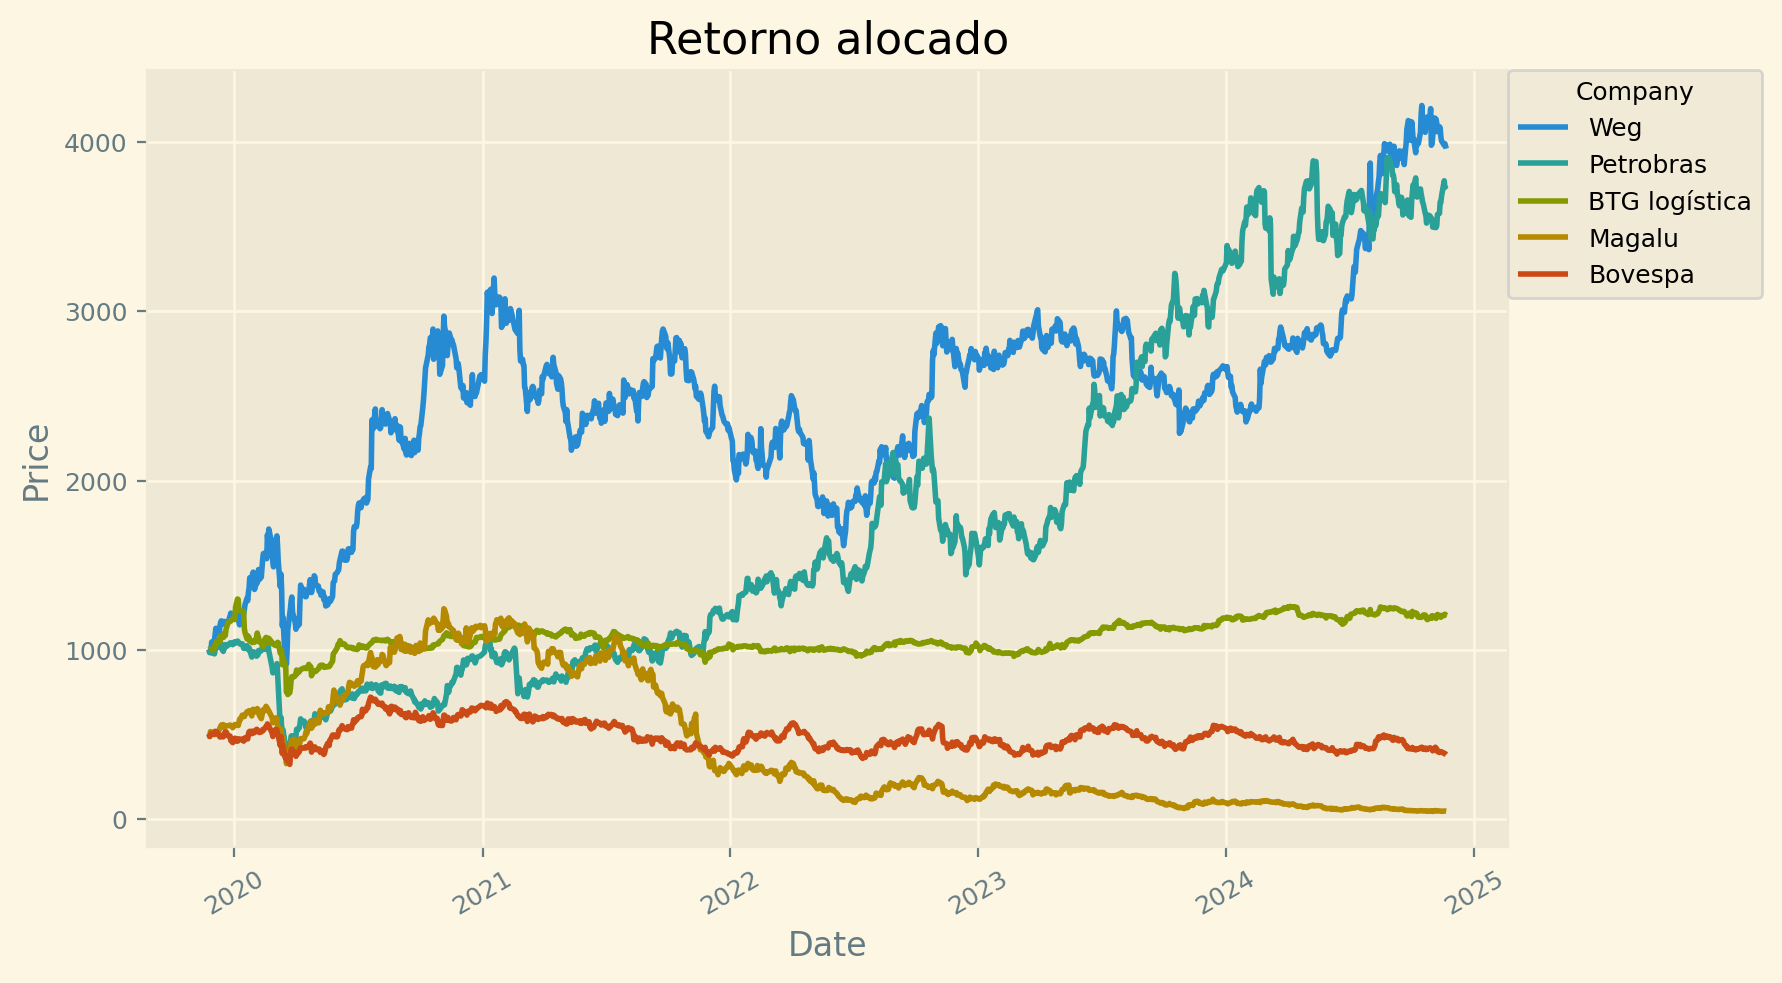

In [10]:
def plot_closing_prices(df_adj_close, title='Adjusted Closing Prices of Stocks Over Time', figsize=(9, 5)):
    """
    Function to plot adjusted closing prices of stocks over time for a given DataFrame.
    
    Parameters:
    - df_adj_close (pd.DataFrame): The DataFrame containing 'Date' as the first column and other columns as prices of different companies.
    - title (str): The title of the plot.
    - figsize (tuple): The size of the figure (width, height).
    """
    # Set the figure size
    plt.figure(figsize=figsize)
    # Plot each company's adjusted closing prices
    for column in df_adj_close.columns[1:]:
        plt.plot(df_adj_close.index, df_adj_close[column], label=column)

    # Customize the plot
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Price')

    # Show legend
    plt.legend(title='Company', loc='upper left', bbox_to_anchor=(1, 1), borderaxespad=0.)

    # Add grid, rotate x-axis labels, and adjust layout
    plt.grid(True)
    plt.xticks(rotation=30)
    plt.tight_layout()

    # Show the plot
    plt.show()

plot_closing_prices(df_alocado, title="Retorno alocado")

In [13]:
df = df_alocado.copy()
df['Carteira'] = df.iloc[:,:].sum(axis=1)
df.round(2)

Price,Marcopolo,Weg,Petrobras,BTG logística,Magalu,Bovespa,Carteira
Date,,,,,,,
2019-11-25 00:00:00+00:00,1000.00,1000.00,1000.00,1000.00,500.00,500.00,5000.00
2019-11-26 00:00:00+00:00,969.70,983.85,981.84,1002.71,485.78,486.71,4910.57
2019-11-27 00:00:00+00:00,977.96,998.28,986.55,1000.19,514.67,496.65,4974.31
2019-11-28 00:00:00+00:00,977.96,1011.34,993.27,999.81,514.67,503.98,5001.03
2019-11-29 00:00:00+00:00,983.47,1045.36,980.49,998.84,508.24,499.48,5015.88
...,...,...,...,...,...,...,...
2024-11-13 00:00:00+00:00,3179.50,4034.70,3643.02,1191.20,44.86,394.10,12487.39
2024-11-14 00:00:00+00:00,3213.62,4008.89,3681.55,1202.32,43.60,395.64,12545.62
2024-11-18 00:00:00+00:00,3264.79,3983.07,3773.41,1201.20,44.71,385.24,12652.43


### Evolução da carteira construída

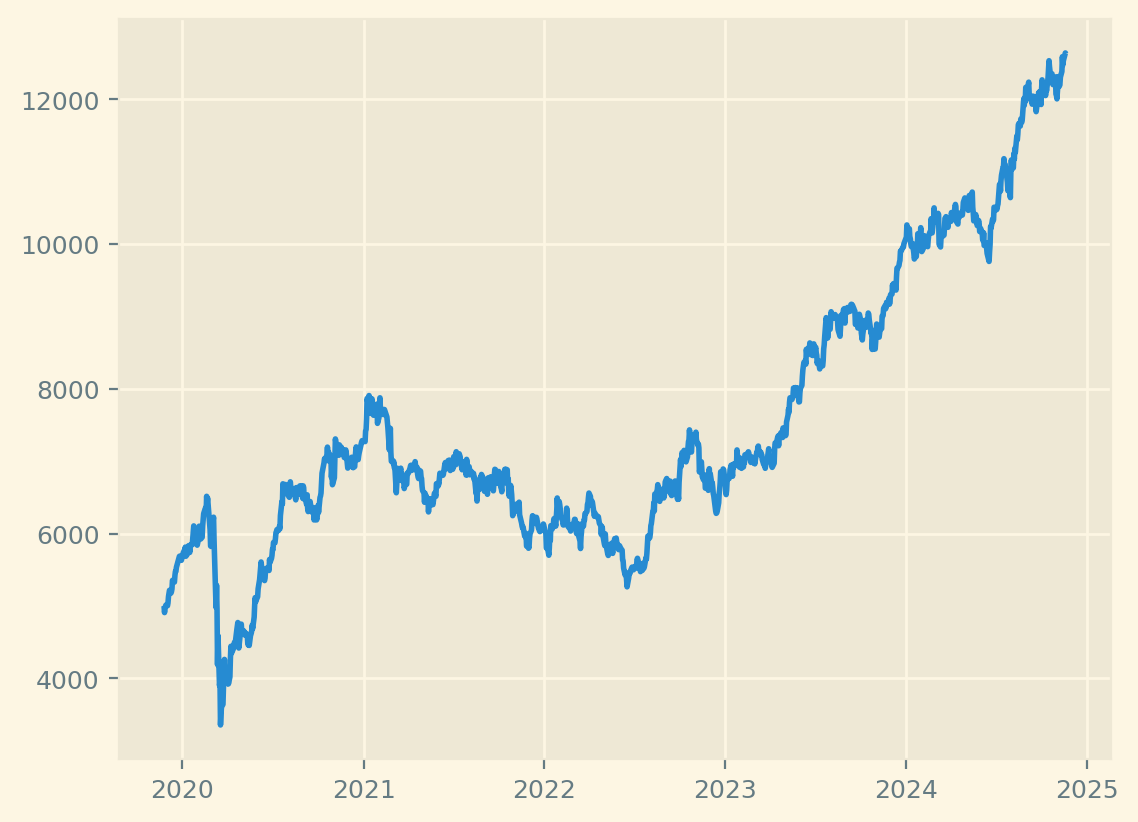

In [89]:
df = df_alocado.copy()
df['Carteira'] = df.iloc[:,:].sum(axis=1)
plt.plot( df['Carteira'])